# Analytical solutions for quantum radiation reaction in high-intensity lasers

Original authors of the paper: T G Blackburn

Link to pre-print: https://journals.aps.org/pra/abstract/10.1103/PhysRevA.103.052425

Author of this notebook: Óscar Amaro

Data from preprint retrieved with WebPlotDigitizer

In [1]:
import numpy as np
from numpy import log, log10, sin, cos, exp, sqrt, pi
import pandas as pd
import glob as glob

# plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm

import json

# warnings
import warnings
warnings.simplefilter('ignore')

def arraycenter(x):
    """
        returns centered array for histograms
    """
    return np.array([(x[i]+x[i+1])/2 for i in range(len(x)-1)])

### Figure 1

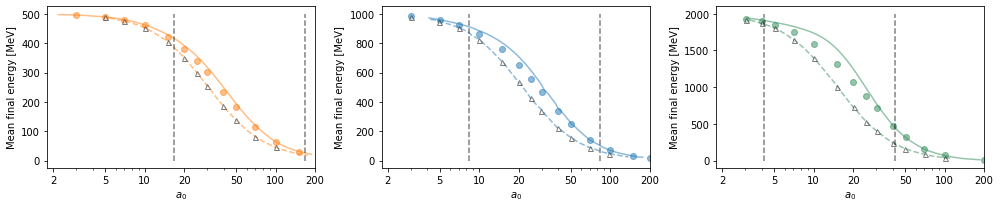

In [2]:
# fluctuations in the data will be due to uncertainty in selecting points in WPD
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,3))
alphaPaper = 0.5

### fig 1a
f = open('dataWPD/fig1a/wpd.json')
data = json.load(f)
# 
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', color='tab:orange', label='0', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:orange', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:orange', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'w^', label='1', markersize=5, markeredgecolor='black', alpha=alphaPaper)


### fig 1b
f = open('dataWPD/fig1b/wpd.json')
data = json.load(f)
# 
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', color='tab:blue', label='0', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'w^', label='1', markersize=5, markeredgecolor='black', alpha=alphaPaper)


### fig 1c
f = open('dataWPD/fig1c/wpd.json')
data = json.load(f)
# 
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', color='seagreen', label='0', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='seagreen', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='seagreen', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'w^', label='1', markersize=5, markeredgecolor='black', alpha=alphaPaper)

def a0vert(E0,chi): return chi/(2*E0/0.511/329719) # 0.8µm laser
x = np.linspace(0,1)
E0lst=np.array([500,1000,2000])

#plt.legend(loc='upper left')
for i in range(3):
    axes[i].plot(x*0+a0vert(E0lst[i],0.1),x*E0lst[i], 'k--',alpha=0.5)
    axes[i].plot(x*0+a0vert(E0lst[i],1),x*E0lst[i], 'k--',alpha=0.5)
    #axes[i].grid()
    #axes[i].set_title('Fig1')
    axes[i].set_xscale('log')
    axes[i].set_xlabel(r'$a_0$')
    axes[i].set_ylabel(r'Mean final energy [MeV]')
    axes[i].set_xlim([1.8,201])
    axes[i].set_xticks([2,5,10,20,50,100,200])
    axes[i].get_xaxis().set_major_formatter(mticker.ScalarFormatter())
plt.tight_layout()
#plt.savefig('fig1.pdf', transparent=True)
plt.show()

### Fig2

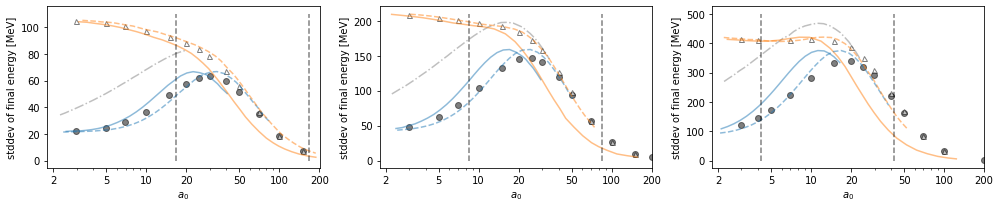

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,3))
alphaPaper = 0.5

### fig 1a
f = open('dataWPD/fig2a/wpd.json')
data = json.load(f)
# 
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-.', color='grey', label='0', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'ko', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'w^', label='1', markersize=5, markeredgecolor='black', alpha=alphaPaper)
#
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][4]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:orange', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][5]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][6]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[0].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:orange', label='1', alpha=alphaPaper)
# 

### fig 1b
f = open('dataWPD/fig2b/wpd.json')
data = json.load(f)
# 
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-.', color='grey', label='0', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'ko', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'w^', label='1', markersize=5, markeredgecolor='black', alpha=alphaPaper)
#
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][4]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:orange', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][5]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][6]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[1].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:orange', label='1', alpha=alphaPaper)


### fig 1c
f = open('dataWPD/fig2c/wpd.json')
data = json.load(f)
# 
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-.', color='grey', label='0', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'ko', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'w^', label='1', markersize=5, markeredgecolor='black', alpha=alphaPaper)
#
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][4]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:orange', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][5]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][6]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
axes[2].plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:orange', label='1', alpha=alphaPaper)
# 

def a0vert(E0,chi): return chi/(2*E0/0.511/329719) # 0.8µm laser
x = np.linspace(0,1)
E0lst=np.array([500,1000,2000])
maxY=np.array([110,210,500])
for i in range(3):
    axes[i].plot(x*0+a0vert(E0lst[i],0.1),x*maxY[i], 'k--',alpha=0.5)
    axes[i].plot(x*0+a0vert(E0lst[i],1),x*maxY[i], 'k--',alpha=0.5)
    #axes[i].grid()
    #axes[i].set_title('Fig1')
    axes[i].set_xscale('log')
    axes[i].set_xlabel(r'$a_0$')
    axes[i].set_ylabel(r'stddev of final energy [MeV]')
    axes[i].set_xlim([1.8,201])
    axes[i].set_xticks([2,5,10,20,50,100,200])
    axes[i].get_xaxis().set_major_formatter(mticker.ScalarFormatter())
plt.tight_layout()
#plt.savefig('fig2.pdf', transparent=True)
plt.show()

### Figure 4

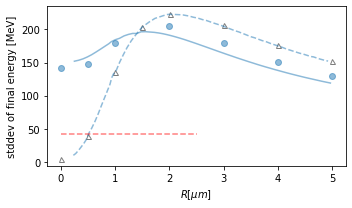

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5,3))
alphaPaper = 0.5

### fig 1a
f = open('dataWPD/fig4/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
plt.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'o', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
plt.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'w^', label='1', markersize=5, markeredgecolor='black', alpha=alphaPaper)
#
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
plt.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'-', color='tab:blue', label='1', alpha=alphaPaper)
# 
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))])
indxs = np.argsort(datatmp2[:,0])
plt.plot(datatmp2[:,0][indxs],datatmp2[:,1][indxs],'--', color='tab:blue', label='1', alpha=alphaPaper)
# 
x = np.linspace(0,1)
E0lst=np.array([500,1000,2000])
maxY=np.array([110,210,500])
plt.plot(x*2.5, x*0+42.5, 'r--', alpha=alphaPaper)
plt.xlabel(r'$R[\mu m]$')
plt.ylabel(r'stddev of final energy [MeV]')
plt.tight_layout()
#plt.savefig('fig4.pdf', transparent=True)
plt.show()